In [1]:
from airport_model_class import AirportModel
from airplane_agent_class import Airplane
import numpy as np

In [2]:
model = AirportModel(10, 10, 10)
for step in range(100):
    model.step()

In [3]:
positions = model.datacollector.get_agent_vars_dataframe()

positions_array = np.zeros( (100, 10, 2) )

for timestep in range(100):
    for agent in range(10):
        positions_array[timestep][agent][0] = (
            positions.xs(timestep, level="Step")["Position"][agent][0]
        )
        positions_array[timestep][agent][1] = (
            positions.xs(timestep, level="Step")["Position"][agent][1]
        )

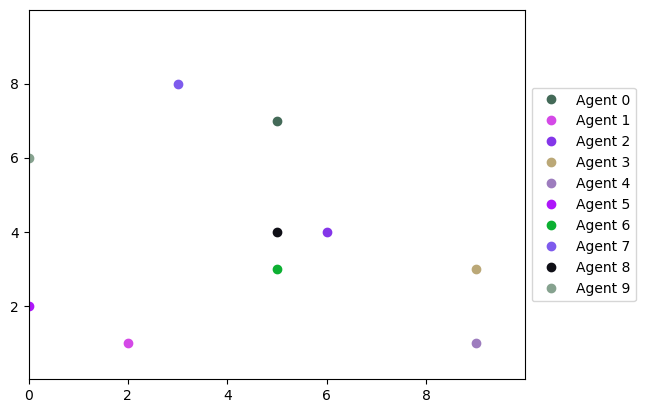

In [4]:


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

# Set up the figure and axis
fig, ax = plt.subplots()

cmap = ListedColormap(np.random.rand(10,3))

# Define the update function for the animation
def update(frame):
    # Clear the axis
    ax.clear()
    
    # Loop through each agent in the current timestep
    for agent in range(10):
        # Get the x and y coordinates of the current agent at the current timestep
        x = positions_array[frame][agent][0]
        y = positions_array[frame][agent][1]
        # Plot a point at the current agent's position
        ax.plot(x, y, 'o', color=cmap(agent), label=f"Agent {agent}")
    # Set the axis limits to fit all the points
    ax.set_xlim(positions_array[:,:,0].min(), positions_array[:,:,0].max())
    ax.set_ylim(positions_array[:,:,1].min(), positions_array[:,:,1].max())
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Return the artists that were updated in this frame
    return []

# Create the animation using the update function and the positions_array as frames
ani = FuncAnimation(fig, update, frames=100, interval=100)
ani.save('animation.gif', writer='pillow')